In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')


In [61]:
df=pd.read_csv('DS2_C5_S7_KCHouse_Data_Practice.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [62]:
df.shape

(21613, 21)

In [63]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [66]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [67]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


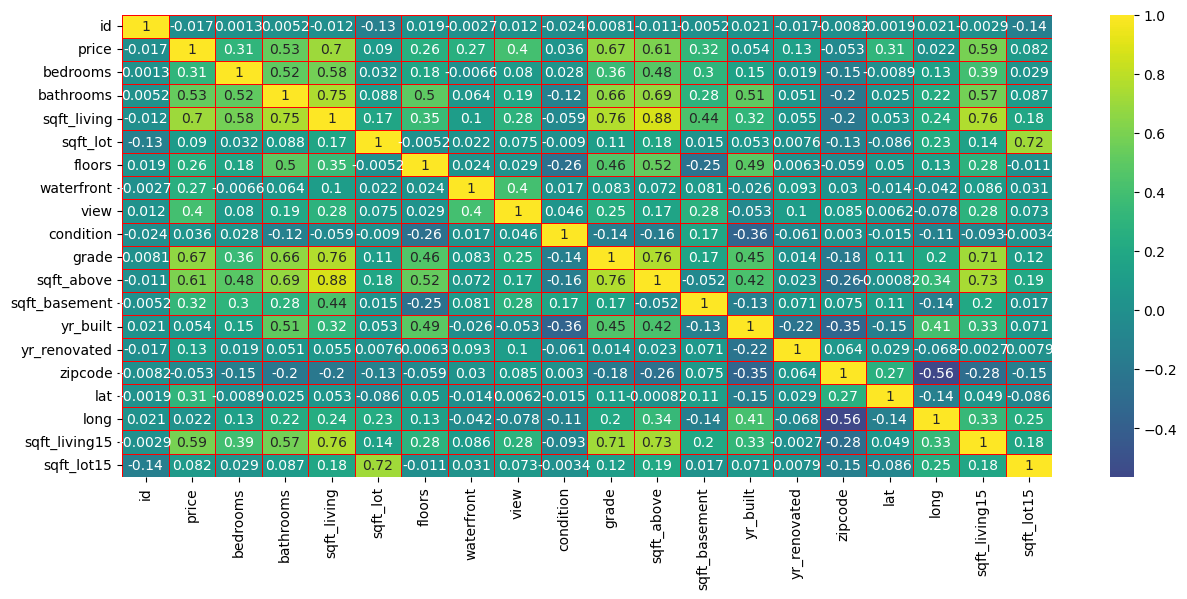

In [68]:
plt.figure(figsize=(15,6))
sb.heatmap(df.corr(),annot=True,linecolor='r',linewidths=.5,cmap='viridis',center=0);

In [69]:
for i in df.columns:
    print(i,':-',df[i].nunique())

id :- 21436
date :- 372
price :- 4028
bedrooms :- 13
bathrooms :- 30
sqft_living :- 1038
sqft_lot :- 9782
floors :- 6
waterfront :- 2
view :- 5
condition :- 5
grade :- 12
sqft_above :- 946
sqft_basement :- 306
yr_built :- 116
yr_renovated :- 70
zipcode :- 70
lat :- 5034
long :- 752
sqft_living15 :- 777
sqft_lot15 :- 8689


In [70]:
df['bedrooms']=df['bedrooms'].astype('category')
df['bathrooms']=df['bathrooms'].astype('category')
df['floors']=df['floors'].astype('category')
df['waterfront']=df['waterfront'].astype('category')
df['view']=df['view'].astype('category')
df['condition']=df['condition'].astype('category')
df['grade']=df['grade'].astype('category')
df['yr_renovated']=df['yr_renovated'].astype('category')
df['zipcode']=df['zipcode'].astype('category')


In [71]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<30:
        cat.append(i)
    else:
        num.append(i)

In [72]:
cat

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [73]:
num

['id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [74]:
df.drop(columns=['id','date'],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Visualization for categorical data.

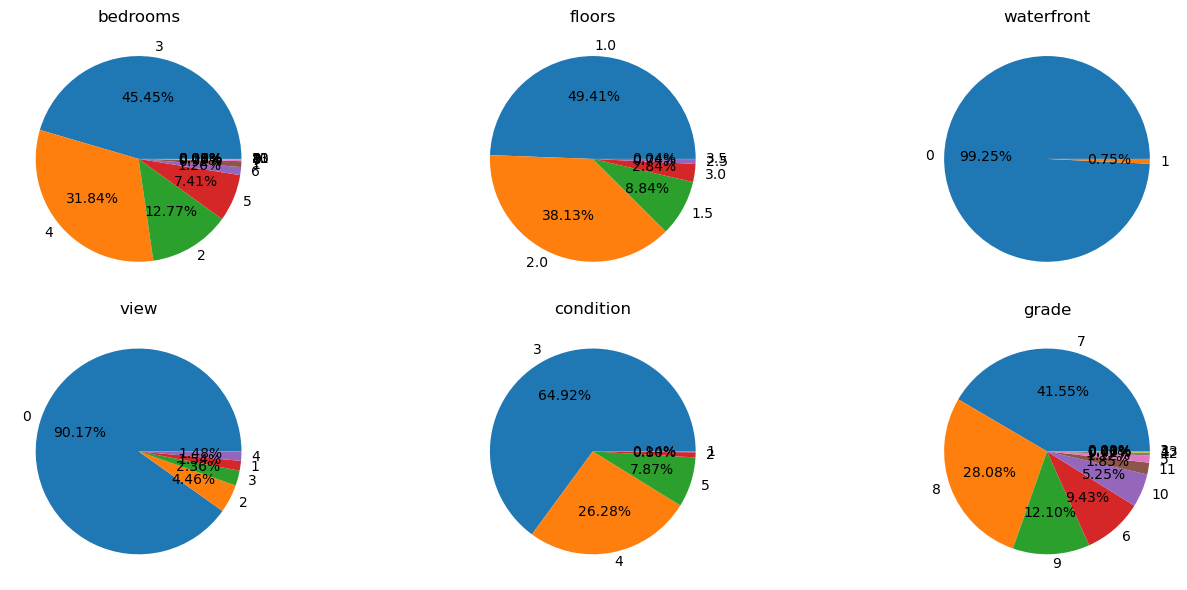

In [75]:
cat_cols=cat
num_col=3
num_rows=int(len(cat_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(15,6))
for col,ax in zip(cat_cols,axs.flatten()[:len(cat_cols)]):
    ax.pie(labels=df[col].value_counts().index,x=df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)

# Visualization for Numerical data

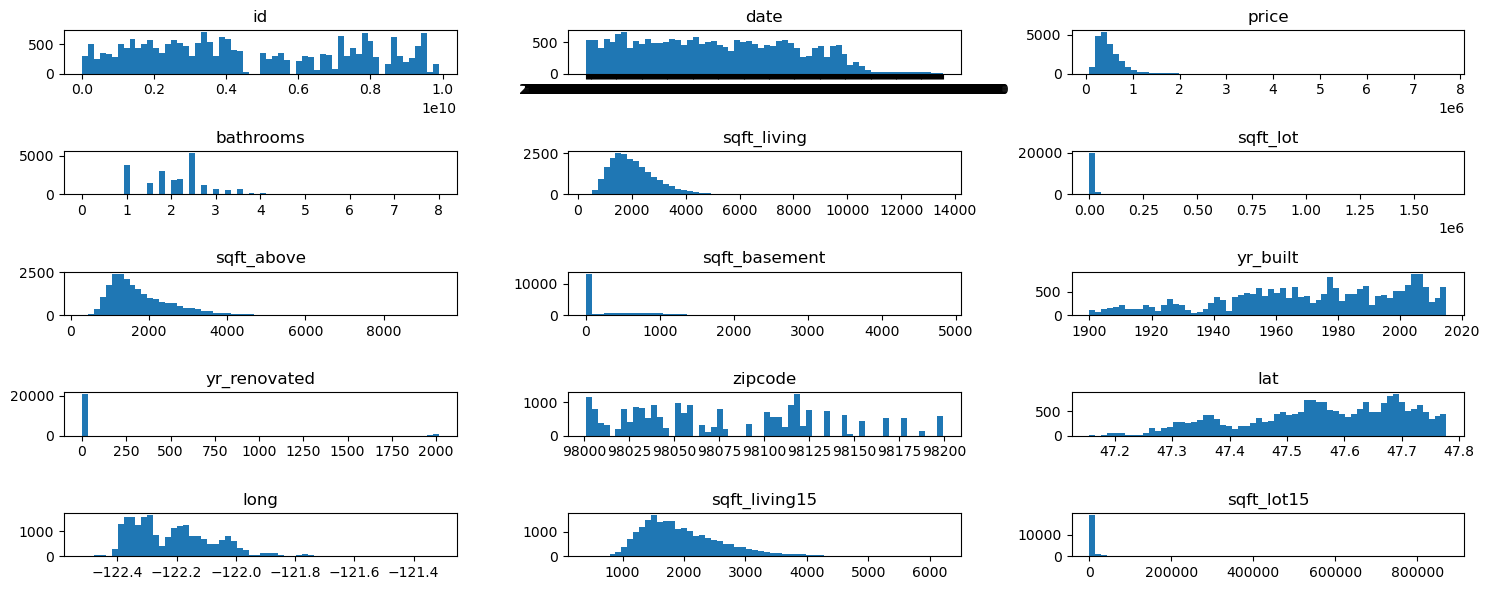

In [77]:
numerical_cols=num
num_col=3
bins=60
num_rows=int(len(numerical_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(15,6))
for col,ax in zip(numerical_cols,axs.flatten()[:len(numerical_cols)]):
    ax.hist(df[col],bins=bins)
    ax.set_title(col)

# Feature Engineering.

In [97]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['bedrooms']=a.fit_transform(df['bedrooms'])
df['bathrooms']=a.fit_transform(df['bathrooms'])
df['floors']=a.fit_transform(df['floors'])
df['waterfront']=a.fit_transform(df['waterfront'])
df['view']=a.fit_transform(df['view'])
df['condition']=a.fit_transform(df['condition'])
df['grade']=a.fit_transform(df['grade'])
df['yr_renovated']=a.fit_transform(df['yr_renovated'])
df['zipcode']=a.fit_transform(df['zipcode'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int64  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  int64  
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [99]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,3,1180,5650,0,0,0,2,5,1180,0,1955,0,66,47.5112,-122.257,1340,5650
1,538000.0,3,8,2570,7242,2,0,0,2,5,2170,400,1951,45,55,47.7210,-122.319,1690,7639
2,180000.0,2,3,770,10000,0,0,0,2,4,770,0,1933,0,16,47.7379,-122.233,2720,8062
3,604000.0,4,11,1960,5000,0,0,0,4,5,1050,910,1965,0,58,47.5208,-122.393,1360,5000
4,510000.0,3,7,1680,8080,0,0,0,2,6,1680,0,1987,0,37,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,9,1530,1131,4,0,0,2,6,1530,0,2009,0,42,47.6993,-122.346,1530,1509
21609,400000.0,4,9,2310,5813,2,0,0,2,6,2310,0,2014,0,60,47.5107,-122.362,1830,7200
21610,402101.0,2,2,1020,1350,2,0,0,2,5,1020,0,2009,0,59,47.5944,-122.299,1020,2007
21611,400000.0,3,9,1600,2388,2,0,0,2,6,1600,0,2004,0,15,47.5345,-122.069,1410,1287


In [175]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866717,-0.406524,-1.449289,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558990,-0.734708,-0.658681,-0.544898,-0.200793,1.603065,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,-0.406524,0.175794,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558990,0.460841,0.245141,-0.681079,4.074709,1.031525,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.505624,-1.449289,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409917,-1.229834,-0.658681,-1.293892,-0.200793,-0.994842,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,0.692576,1.150844,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558990,-0.891699,1.397515,-0.204446,-0.200793,1.187400,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.406524,-0.149222,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291936,-0.130895,-0.658681,0.544548,-0.200793,0.096279,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.406524,0.500811,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291936,-0.312039,-0.658681,1.293542,-0.200793,0.356069,1.004958,-0.938069,-0.666135,-0.412381
21609,-0.381588,0.692576,0.500811,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291936,0.629908,-0.658681,1.463768,-0.200793,1.291316,-0.356180,-1.051685,-0.228419,-0.203946
21610,-0.375865,-1.505624,-1.774306,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558990,-0.927928,-0.658681,1.293542,-0.200793,1.239358,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.381588,-0.406524,0.500811,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291936,-0.227505,-0.658681,1.123316,-0.200793,-1.046800,-0.184414,1.028910,-0.841221,-0.420511


In [176]:
x=df1.drop(columns='price',axis=1)
y=df1['price']

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=8)

# Task 2:Base line for Linear Regression.

# Splitting data.

In [178]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model=LR.fit(x_train,y_train)
model.score(x_train,y_train)

0.6982527253966906

In [179]:
y_pred=model.predict(x_test)
y_pred

array([-0.21569192,  0.42115451, -1.06643791, ..., -1.06523531,
        0.20463127, -0.82353245])

# Accuracy for testing data.

In [180]:
model.fit(x_test,y_test)
model.score(x_train,y_train)

0.6955252911511994

# Model Evalations.

In [181]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

0.30492593077408947

In [182]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

0.3362131073641447

In [183]:
from sklearn.metrics import mean_absolute_error
RMSE=mean_squared_error(y_test,y_pred,squared=False)
RMSE

0.5522009876612767

In [184]:
print('R_square',model.score(x_train,y_train))
print('MSE',MSE)
print('MAE',MAE)
print('RMSE',RMSE)

R_square 0.6955252911511994
MSE 0.30492593077408947
MAE 0.3362131073641447
RMSE 0.5522009876612767


# Task 3: Bagging with Random Forest.

In [230]:
name=[]
neg_mean_absolute_error=[]
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
RF=RandomForestRegressor()
cv=KFold(n_splits=7,shuffle=True,random_state=42)
score=cross_val_score(RF,x,y,scoring='neg_mean_absolute_error',cv=cv)
name.append('RF')
neg_mean_absolute_error.append(np.sqrt(-score).mean())
print('mean_score',np.sqrt(-score).mean())

mean_score 0.43224596895348616


# Task 4: Boosting using Adaboosting.

In [231]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
ADA=AdaBoostRegressor()
cv=KFold(n_splits=7,shuffle=True,random_state=42)
score=cross_val_score(ADA,x,y,scoring='neg_mean_absolute_error',n_jobs=-1)
print('mean_score',np.sqrt(-score).mean())
name.append('ADA')
neg_mean_absolute_error.append(np.sqrt(-score).mean())


mean_score 0.8861446830113817


In [169]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Task 5: Stacking.

In [283]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [287]:
def get_stacking():
    #Base model
    label=[]
    label.append(('LOR',DecisionTreeRegressor()))
    label.append(('KNN',KNeighborsRegressor()))
    label.append(('SVM',SVC()))
    #meat model
    label1=[]
    label1=LinearRegression()
    #Define stacking
    model1=StackingRegressor(estimators=label,final_estimator=label1,cv=7)
    return model1
  

In [293]:
label=[]
label.append(('LOR',DecisionTreeRegressor()))
label.append(('KNN',KNeighborsRegressor()))
label.append(('SVM',SVR()))
label1=[]
label1=LinearRegression()
    #Define stacking
model1=StackingRegressor(estimators=label,final_estimator=label1,cv=7)
cv=KFold(n_splits=2,shuffle=True,random_state=42)
score=cross_val_score(model1,x,y,cv=cv,verbose=0,n_jobs=-1,scoring='neg_root_mean_squared_error')
print('mean_score',np.sqrt(-score).mean())

mean_score 0.6466526578927208


# Task 6: Evaluate the Best model and predictionon the test data.

# Evaluate the best model on the whole training dataset.

Conclusion:- ADABoosting is the best model on whole training dataset.

# Make a prediction on the test dataset.

In [239]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
ada.score(x_train,y_train)

0.12827636043704393

In [240]:
y_pred1=ada.predict(x_test)
y_pred1

array([0.66517543, 0.78015183, 0.1884352 , ..., 0.1884352 , 0.66517543,
       0.1884352 ])

In [241]:
ada.fit(x_test,y_test)
ada.score(x_train,y_train)

0.39849395157453993

In [250]:
y_pred1.shape

(4323,)

# Plot the  original and prediction price values.

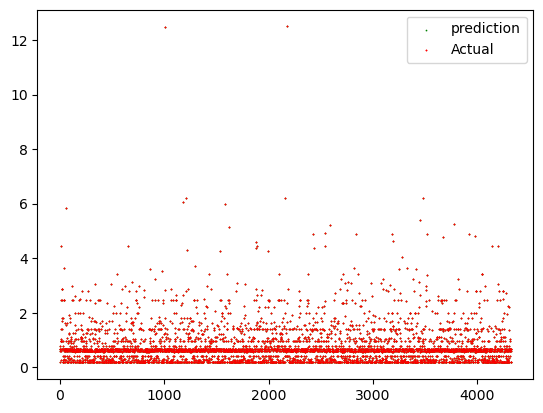

In [251]:
plt.scatter(x=range(4323),y=y_pred1,color='Green',label='prediction',s=0.1,marker='^')
plt.scatter(x=range(4323),y=y_pred1,color='Red',label='Actual',s=0.1,marker='*')
plt.legend();